# Support Vector Machines
This notebook explores the SVM algorithm.
You should fill out the <span style="color:purple">**3 dots ...**</span> with the corresponding lines of codes. <br>

In [3]:
import matplotlib.pyplot as plt

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

# Linear SVM Classification

In [4]:
# extra code – this cell generates and saves Figure 5–1

import matplotlib.pyplot as plt
import numpy as np
from sklearn.svm import SVC
from sklearn import datasets
from utils import plot_svc_decision_boundary
# Loading the iris dataset from sklearn.datasets
# iris is a dictionary with keys the data, target, the dataframe joining data and target called frame, 
# the target_names i.e., the dependent variables' names, DESCR (it summarizes the Exploratory Data Analysis of the iris dataset), 
# feature_names i.e., the independent variables' names, filename (the source file of the dataset), 
# and data_module (the class sklearn.datasets.data from which iris is inherited)
iris = datasets.load_iris(as_frame=True)
# X is the data values corresponding to ONLY the 'petal length' and 'petal width' features
# X = iris.frame[['petal length (cm)', 'petal width (cm)']]
X = iris.data[["petal length (cm)", "petal width (cm)"]].values
# y is the target 
y = iris.target
# Print the number of classes i.e., the number of targets
print(y.unique())

[0 1 2]


In [5]:
iris.DESCR

# iris.DESCR 是用来访问加载自 Scikit-learn 的 Iris 数据集描述的属性。DESCR 保存了关于数据集的详细描述，包括数据集的信息，创建者信息，属性信息，以及数据集的统计摘要。

# 加载数据集后，可以直接打印 DESCR 属性来阅读这些信息。这通常是探索和了解新数据集的好方法。

'.. _iris_dataset:\n\nIris plants dataset\n--------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n                \n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)\n    ============== ==== =

In [6]:
# Filter the iris dataset on the first 2 classes 
setosa_or_versicolor = (y == 0) | (y == 1)
X = X[setosa_or_versicolor]
y = y[setosa_or_versicolor]

In [7]:
# Split the dataset to train and test sets
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
# Initialize the SVM Classifier model, 

# set the hyperparameter C to infinity and the hyperparameter kernel to linear
# svm_clf = SVC(kernel="linear", C = float("inf")) # 正则化参数
# svm_clf = SVC(kernel="linear", C = np.inf) # np.inf
svm_clf = SVC(kernel="linear", C = 1e9)

# Fit the SVM CLassifier model to the data
# svm_clf.fit(X_train, y_train)
svm_clf.fit(X,y)

SVC(C=1000000000.0, kernel='linear')

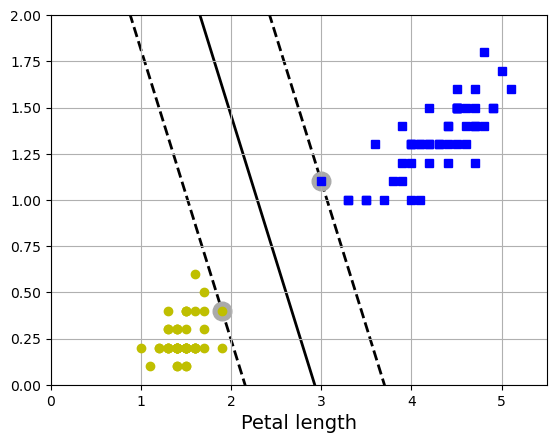

In [8]:
plot_svc_decision_boundary(svm_clf, 0, 5.5)
# setting the data points belonging to class 1 to blue squares ('bs') 
# to distinguish them from the data points belonging to the other classes
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs")
# setting the data points belonging to class 0 to yellow ovals ('yo')
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo")
plt.xlabel("Petal length")
# setting the x axis values between [0, 5.5] and the y axis values between [0, 2] for a better vizualization
plt.axis([0, 5.5, 0, 2])
plt.grid()
plt.show()

# Initialize a Standard Scaler and apply on the training data (to do)

In [9]:
from sklearn.preprocessing import StandardScaler
# Initialize the Standard scaler
scaler = StandardScaler()
# # Scale tha data X
X_scaled = scaler.fit_transform(X)
# Initialize and fit a new model svm_clf_scaled with the scaled data using the same hyperparameters setting like above.
svm_clf_scaled = SVC(kernel="linear", C = 1e9)
svm_clf_scaled.fit(X_scaled, y)

SVC(C=1000000000.0, kernel='linear')

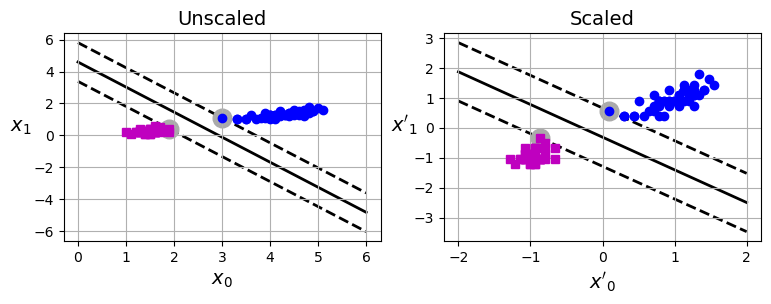

In [10]:
# Lets us see the difference
plt.figure(figsize=(9, 2.7))
plt.subplot(121)
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bo")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "ms")
plot_svc_decision_boundary(svm_clf, 0, 6)
plt.xlabel("$x_0$")
plt.ylabel("$x_1$   ", rotation=0)
plt.title("Unscaled")
# plt.axis([0, 5.5, 0, 2])
plt.grid()

plt.subplot(122)
plt.plot(X_scaled[:, 0][y==1], X_scaled[:, 1][y==1], "bo")
plt.plot(X_scaled[:, 0][y==0], X_scaled[:, 1][y==0], "ms")
plot_svc_decision_boundary(svm_clf_scaled, -2, 2)
plt.xlabel("$x'_0$")
plt.ylabel("$x'_1$  ", rotation=0)
plt.title("Scaled")
# plt.axis([-2, 2, -2, 2])
plt.grid()
plt.show()

# Hard vs Soft Margin Classification
## Hard Margin Classification

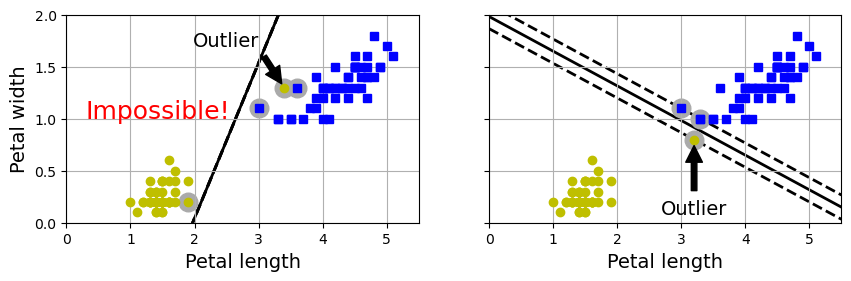

In [11]:
X_outliers = np.array([[3.4, 1.3], [3.2, 0.8]])
y_outliers = np.array([0, 0])
Xo1 = np.concatenate([X, X_outliers[:1]], axis=0)# adding the data point [[3.4, 1.3]]
yo1 = np.concatenate([y, y_outliers[:1]], axis=0)# adding the corresponding target value of the data point [[3.4, 1.3]]
Xo2 = np.concatenate([X, X_outliers[1:]], axis=0)# adding the data point [[3.2, 0.8]]
yo2 = np.concatenate([y, y_outliers[1:]], axis=0)# adding the corresponding target value of the data point

# Initialize an SVM CLassifier with linear kernal and C = 10^9
svm_clf1 = SVC(kernel="linear", C = 1e9)
# Fit the model with data Xo1 and yo1 
svm_clf1.fit(Xo1, yo1)

# Initialize an SVM CLassifier with linear kernal and C = 10^9
svm_clf2 = SVC(kernel="linear", C = 1e9)
# Fit the model with data Xo2 and yo2 
svm_clf2.fit(Xo2, yo2)

# Let us plot the results
fig, axes = plt.subplots(ncols=2, figsize=(10, 2.7), sharey=True)

plt.sca(axes[0])
plt.plot(Xo1[:, 0][yo1==1], Xo1[:, 1][yo1==1], "bs")
plt.plot(Xo1[:, 0][yo1==0], Xo1[:, 1][yo1==0], "yo")
plot_svc_decision_boundary(svm_clf1, 0, 5.5)
plt.text(0.3, 1.0, "Impossible!", color="red", fontsize=18)
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.annotate(
    "Outlier",
    xy=(X_outliers[0][0], X_outliers[0][1]),
    xytext=(2.5, 1.7),
    ha="center",
    arrowprops=dict(facecolor='black', shrink=0.1),
)
plt.axis([0, 5.5, 0, 2])
plt.grid()

plt.sca(axes[1])
plt.plot(Xo2[:, 0][yo2==1], Xo2[:, 1][yo2==1], "bs")
plt.plot(Xo2[:, 0][yo2==0], Xo2[:, 1][yo2==0], "yo")
plot_svc_decision_boundary(svm_clf2, 0, 5.5)
plt.xlabel("Petal length")
plt.annotate(
    "Outlier",
    xy=(X_outliers[1][0], X_outliers[1][1]),
    xytext=(3.2, 0.08),
    ha="center",
    arrowprops=dict(facecolor='black', shrink=0.1),
)
plt.axis([0, 5.5, 0, 2])
plt.grid()

plt.show()

### Encapsulating the preprocessing and Modeling within a Machine Learning pipelime

In the following cell, we will reproduce the previous steps of:
- data loading
- data scaling
- model initialization
- model fitting

with the use of pipelines from sklearn.

In [12]:
iris

{'data':      sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
 0                  5.1               3.5                1.4               0.2
 1                  4.9               3.0                1.4               0.2
 2                  4.7               3.2                1.3               0.2
 3                  4.6               3.1                1.5               0.2
 4                  5.0               3.6                1.4               0.2
 ..                 ...               ...                ...               ...
 145                6.7               3.0                5.2               2.3
 146                6.3               2.5                5.0               1.9
 147                6.5               3.0                5.2               2.0
 148                6.2               3.4                5.4               2.3
 149                5.9               3.0                5.1               1.8
 
 [150 rows x 4 columns],
 'target': 0     

In [13]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

# Load the iris dataset
iris = load_iris(as_frame=True)
# Extract the data and filter it on the  features petal length and petal width.
X = iris.data[["petal length (cm)", "petal width (cm)"]].values
# Extract the target data 
# In the iris dataset there is 3 classes. we would like to create a model that only predicts if the data point belongs or not 
# to the third class (y==2, Iris virginica). 
# Thus, convert the y into a binary vector, such that when yi == 1.0, the data point i belongs to class 2,
# and when yi == 0.0, the data point i belongs to classes 0 (Iris-Setosa) or 1 (Iris-Versicolour).
y = np.where(iris.target == 2, 1.0, 0.0)
# Initialize a standard scaler
scaler = StandardScaler()
# Initialize a linear SVM with C=1
svm = LinearSVC(C = 1)
# Initialize the pipeline with the standard scaler 'scaler' and the SVM classifier 'svm'
svm_clf = make_pipeline(scaler, svm)
# Fit the pipeline to the data
svm_clf.fit(X, y)
# Predict using this pipeline on a new data set X_new
X_new = [[5.5, 1.7], [5.0, 1.5]]
y_new_pred = svm_clf.predict(X_new)
print('predictions:', y_new_pred)
# Print the method the confidence scores. 
# The confidence scores are the distance between the instance and the decision boundary. 
# They are not class probabilities.
confidence_scores = svm_clf.decision_function(X_new)
for i in range(len(X_new)):
    print('the confidence score of ', X_new[i],' is:', confidence_scores[i])

predictions: [1. 0.]
the confidence score of  [5.5, 1.7]  is: 0.6616360603481559
the confidence score of  [5.0, 1.5]  is: -0.22035852082495588


/Users/fulin/anaconda3/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


## Soft Margin Classification
### How does the C hyperparameter influences the learning?

/Users/fulin/anaconda3/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/fulin/anaconda3/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


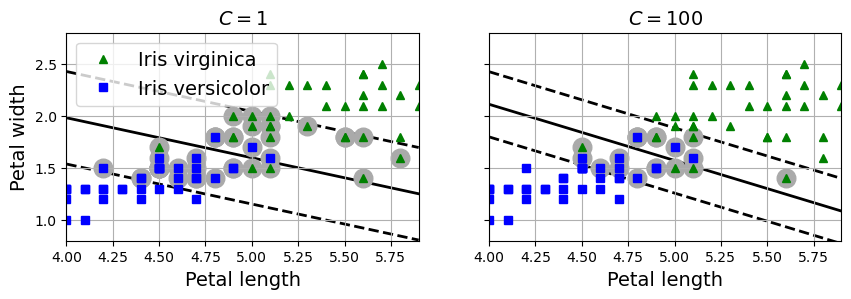

In [14]:
# Initialize a standard scaler
scaler = StandardScaler() 
# Initialize 2 linear SVMs with both 10000 maximum iterations to be run and one with C=1 while the other with C=100 
svm_clf1 = LinearSVC(C=1, max_iter=10000, random_state=42)
svm_clf2 = LinearSVC(C=100, max_iter=10000, random_state=42)
 
# Create 2 pipelines with each the scaler and the SVM model
scaled_svm_clf1 = make_pipeline(scaler, svm_clf1) 
scaled_svm_clf2 = make_pipeline(scaler, svm_clf2) 
# Fit bothe pipelines to the data (X, y)
scaled_svm_clf1.fit(X, y)
scaled_svm_clf2.fit(X, y)

# Let us plot the fitted data from both models 
# Convert to unscaled parameters
b1 = svm_clf1.decision_function([-scaler.mean_ / scaler.scale_])
b2 = svm_clf2.decision_function([-scaler.mean_ / scaler.scale_])
w1 = svm_clf1.coef_[0] / scaler.scale_
w2 = svm_clf2.coef_[0] / scaler.scale_
svm_clf1.intercept_ = np.array([b1])
svm_clf2.intercept_ = np.array([b2])
svm_clf1.coef_ = np.array([w1])
svm_clf2.coef_ = np.array([w2])

# Find support vectors (LinearSVC does not do this automatically)
# The data points belonging to class 1 and are not support vec should be far from the decision function H1 (to its right)
#  --> (W^Tx + b)>=1 or t*(W^Tx + b)>=1 with t=1
# The data points belonging to class 0 and are not support vec should be far from the decision function H2 (to its left)
#  --> (W^Tx + b)<=-1 or t*(W^Tx + b)>=1 with t=-1
# The support vectors are the data points that are so hard to classify:
# --> The support vectors of class 1 are: (W^Tx + b)<1 with t=1
# The support vectors of class 0 are: t*(W^Tx + b)<1 with t=-1
t = y * 2 - 1 # with this equation if yi==1 --> ti==1, elif yi==0 --> ti==-1
support_vectors_idx1 = (t * (X.dot(w1) + b1) < 1).ravel()
support_vectors_idx2 = (t * (X.dot(w2) + b2) < 1).ravel()
svm_clf1.support_vectors_ = X[support_vectors_idx1]
svm_clf2.support_vectors_ = X[support_vectors_idx2]

fig, axes = plt.subplots(ncols=2, figsize=(10, 2.7), sharey=True)

plt.sca(axes[0])
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^", label="Iris virginica")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs", label="Iris versicolor")
plot_svc_decision_boundary(svm_clf1, 4, 5.9)
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.legend(loc="upper left")
plt.title(f"$C = {svm_clf1.C}$")
plt.axis([4, 5.9, 0.8, 2.8])
plt.grid()

plt.sca(axes[1])
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
plot_svc_decision_boundary(svm_clf2, 4, 5.99)
plt.xlabel("Petal length")
plt.title(f"$C = {svm_clf2.C}$")
plt.axis([4, 5.9, 0.8, 2.8])
plt.grid()

plt.show()

# Nonlinear SVM Classification

In [15]:
from sklearn.datasets import make_moons
from sklearn.preprocessing import PolynomialFeatures

# Loading a non linear dataset 
X, y = make_moons(n_samples=100, noise=0.15, random_state=42)


# Initialize a pipeline of 3 steps: a polynomial features transformer of degrees=3, 
# followed by a standard scaler, and finally a linear SVM with C=10 & 10000 max iterations to be run.
pf = PolynomialFeatures(degree=3)
scaler = StandardScaler()

svm_clf3 = LinearSVC(max_iter=10000, C=10)
polynomial_svm_clf = make_pipeline(pf, scaler, svm_clf3)
# Fit the pipeline to the data
polynomial_svm_clf.fit(X,y)


/Users/fulin/anaconda3/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=3)),
                ('standardscaler', StandardScaler()),
                ('linearsvc', LinearSVC(C=10, max_iter=10000))])

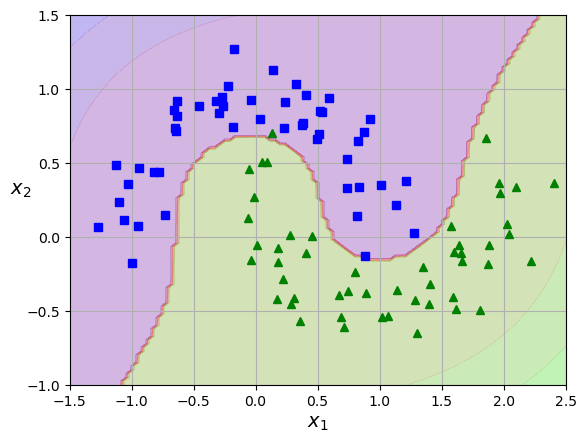

In [16]:
from utils import plot_predictions, plot_dataset
plot_predictions(polynomial_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])

plt.show()

## Non Linear SVM with the Polynomial Kernel

In [17]:
from sklearn.svm import SVC
# Initialize a pipeline of 2 steps: a standard scaler 
# followed by a polynomial SVM of degree 3 with C=5 & coef0 set to 1.
# The hyperparameter coef0 controls how much the model is influenced by high degree terms (Xi) versus low degree terms (Xj)
# because: Xi is >> --> Xi^d >> however since Xj << 1 --> Xj^d is almost 0; d = polynomial degree.
# coef0 deals with these discrepencies. https://scikit-learn.org/stable/modules/svm.html#kernel-functions 
svc3 = SVC(kernel="poly", degree=3, C = 5, coef0=1) 
scaler = StandardScaler()
poly_kernel_svm_clf = make_pipeline(scaler, svc3)
# Fit the pipeline to the data (X, y)
poly_kernel_svm_clf.fit(X, y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(C=5, coef0=1, kernel='poly'))])

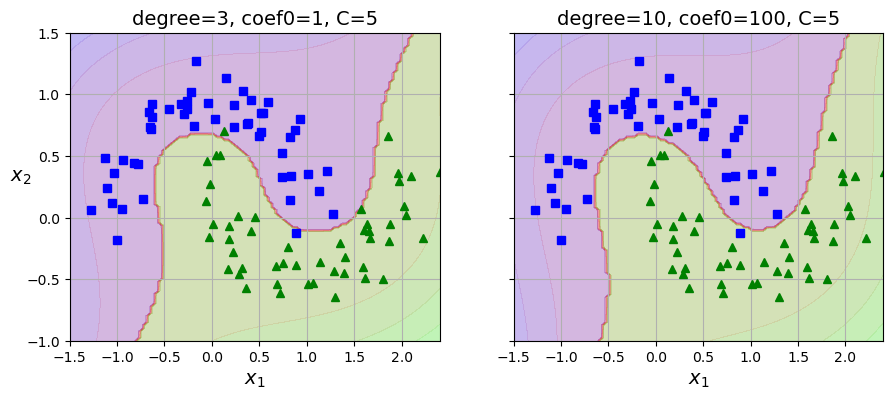

In [18]:
from sklearn.svm import SVC
# Initialize a pipeline of 2 steps: a standard scaler 
# followed by a polynomial SVM of degree 10 with C=5 & coef0 set to 100.
svc4 = SVC(kernel="poly", degree=3, C = 5, coef0=100) 
scaler = StandardScaler()
poly100_kernel_svm_clf = make_pipeline(scaler, svc4)
# Fit the pipeline to the data (X, y)
poly100_kernel_svm_clf.fit(X, y)

# Let us plot the decision boundaries and the predictions
fig, axes = plt.subplots(ncols=2, figsize=(10.5, 4), sharey=True)

plt.sca(axes[0])
plot_predictions(poly_kernel_svm_clf, [-1.5, 2.45, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.4, -1, 1.5])
plt.title("degree=3, coef0=1, C=5")

plt.sca(axes[1])
plot_predictions(poly100_kernel_svm_clf, [-1.5, 2.45, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.4, -1, 1.5])
plt.title("degree=10, coef0=100, C=5")
plt.ylabel("")

plt.show()

`从来不用10度的，很有可能过拟合`

## Gaussian RBF Kernel

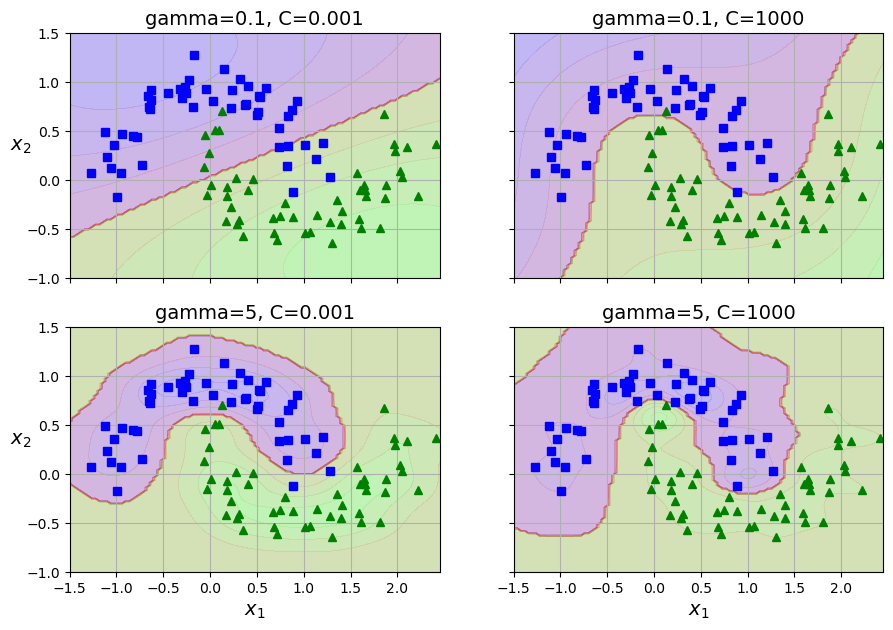

In [19]:
from sklearn.svm import SVC

gamma1, gamma2 = 0.1, 5
C1, C2 = 0.001, 1000
hyperparams = (gamma1, C1), (gamma1, C2), (gamma2, C1), (gamma2, C2)

svm_clfs = []
for gamma, C in hyperparams:
    # Initialize a pipeline with a standard scaler followed by an SVM model with a radial asis function as a kernel 
    # and gamma == gamma and C == C (in the hyperparams list).
    rbf_kernel_svm_clf = make_pipeline(scaler, SVC(kernel="rbf", gamma=gamma, C = C))
    # Fit the model
    rbf_kernel_svm_clf.fit(X, y)
    
    svm_clfs.append(rbf_kernel_svm_clf)

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10.5, 7), sharex=True, sharey=True)

for i, svm_clf in enumerate(svm_clfs):
    plt.sca(axes[i // 2, i % 2])
    plot_predictions(svm_clf, [-1.5, 2.45, -1, 1.5])
    plot_dataset(X, y, [-1.5, 2.45, -1, 1.5])
    gamma, C = hyperparams[i]
    plt.title(f"gamma={gamma}, C={C}")
    if i in (0, 1):
        plt.xlabel("")
    if i in (1, 3):
        plt.ylabel("")

plt.show()

# SVM Regression
## Linear SVM Regression

In [20]:
from sklearn.svm import LinearSVR

# Generating a new linear data for SVM regression
np.random.seed(42)
X = 2 * np.random.rand(50, 1)
y = 4 + 3 * X[:, 0] + np.random.randn(50)

# Initialize a pipeline with a standard scaler and a linear regression SVM model such that the width
# of the street set to 0.5
# The width of the street in regression SVM is controlled by the epsilon variable.
svm_reg = make_pipeline(scaler, LinearSVR(epsilon=0.5))
# Fit the pipeline to the data
svm_reg.fit(X, y)

/Users/fulin/anaconda3/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearsvr', LinearSVR(epsilon=0.5))])

In [21]:
# Initialize a pipeline with a standard scaler and a linear regression SVM model such that the width
# of the street set to 1.2
svm_reg2 = make_pipeline(scaler, LinearSVR(epsilon=1.2))
# Fit the pipeline to the data
svm_reg2.fit(X, y)

/Users/fulin/anaconda3/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearsvr', LinearSVR(epsilon=1.2))])

In [22]:
from utils import plot_svm_regression
from sklearn.svm import LinearSVR
def find_support_vectors(svm_reg: LinearSVR, X:np.array, y:np.array)->np.array:
    """
    Returns the support vectors of the data (X,y) using the linear regression SVM model svm_reg.
    In Regression SVM, the support vectors are all the data points that are off the street.
    The data points on the street do not influence the model --> are not support vectors.
    Parameters:
    -----------
    svm_reg: sklearn.svm.LinearSVR
        The fitted linear regression SVM model on the data (X, y)
    X: numpy.array
        The independent variables / features
    y: numpy.array
        The dependent variable / target
    Returns:
    --------
    np.argwhere(off_margin): numpy.array
        The indices of elements that are non-zero. 
        Example: if v = np.array([[0,1,2], [3,1,5]]), np.argwhere(v>1)==array([0,2], [1,1], [1,2])
        
    """
    # Predict using the pipeline svm_reg on the data X
    y_pred = svm_reg.predict(X)
    # Extract the epsilon's value from the model; the model is the second object in the pipeline (also the last here)
    epsilon = svm_reg[1].epsilon
    # Extract the indices of the data points that are off the street (off the margin) and return them
    residuals = np.abs(y - y_pred)
    # To do that, we ask you to create the boolean condition off_margin
    off_margin = residuals > epsilon
    return np.argwhere(off_margin).flatten() 

# Creating a new attribute 'support_' for the regression svm; LinearSVR does not have a support_ attribute.
# use the implemented function find_support_vectors to set the support_ attribute for both models
svm_reg._support = find_support_vectors(svm_reg, X, y)

svm_reg2._support = find_support_vectors(svm_reg2, X, y)

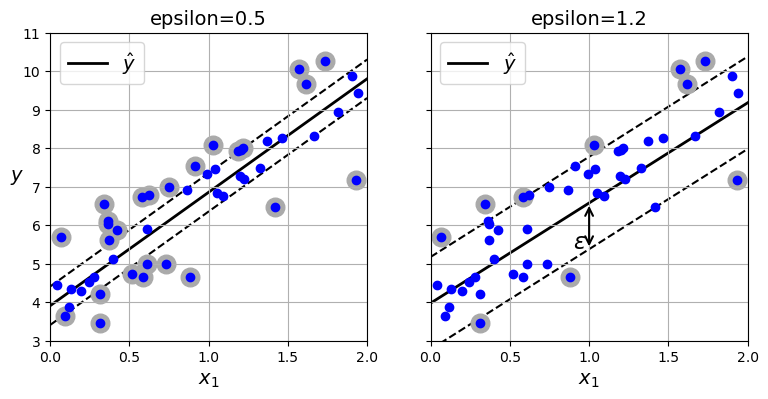

In [23]:
# Let us plot and vizualize both models' performances
eps_x1 = 1
eps_y_pred = svm_reg2.predict([[eps_x1]])

fig, axes = plt.subplots(ncols=2, figsize=(9, 4), sharey=True)
plt.sca(axes[0])
plot_svm_regression(svm_reg, X, y, [0, 2, 3, 11])
plt.title(f"epsilon={svm_reg[-1].epsilon}")
plt.ylabel("$y$", rotation=0)
plt.grid()
plt.sca(axes[1])
plot_svm_regression(svm_reg2, X, y, [0, 2, 3, 11])
plt.title(f"epsilon={svm_reg2[-1].epsilon}")
plt.annotate(
        '', xy=(eps_x1, eps_y_pred), xycoords='data',
        xytext=(eps_x1, eps_y_pred - svm_reg2[-1].epsilon),
        textcoords='data', arrowprops={'arrowstyle': '<->', 'linewidth': 1.5}
    )
plt.text(0.90, 5.4, r"$\epsilon$", fontsize=16)
plt.grid()

plt.show()

## Non Linear SVM Regression

In [24]:
from sklearn.svm import SVR

# Generating a quadratic dataset
np.random.seed(42)
X = 2 * np.random.rand(50, 1) - 1
y = 0.2 + 0.1 * X[:, 0] + 0.5 * X[:, 0] ** 2 + np.random.randn(50) / 10

# Initialize a pipeline with a standard scaler and a nonlinear regression SVM model such that the width
# of the street set to 0.1, the hyperparameter C set to 0.01 and the polynomial degree = 2
svm_poly_reg = make_pipeline(scaler, SVR(epsilon=0.1, C=0.01, degree=2))
# Fit the pipeline to the data
svm_poly_reg.fit(X, y)

# Initialize a pipeline with a standard scaler and a nonlinear regression SVM model such that the width
# of the street set to 0.1, the hyperparameter C set to 100 and the polynomial degree = 2
svm_poly_reg2 = make_pipeline(scaler, SVR(epsilon=0.1, C=100, degree=2))
# Fit the pipeline to the data
svm_poly_reg2.fit(X, y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svr', SVR(C=100, degree=2))])

In [25]:
# Creating a new attribute 'support_' for the regression svm.
# use the implemented function find_support_vectors to set the support_ attribute for both models
svm_poly_reg._support = find_support_vectors(svm_poly_reg, X, y)
svm_poly_reg2._support =  find_support_vectors(svm_poly_reg2, X, y)

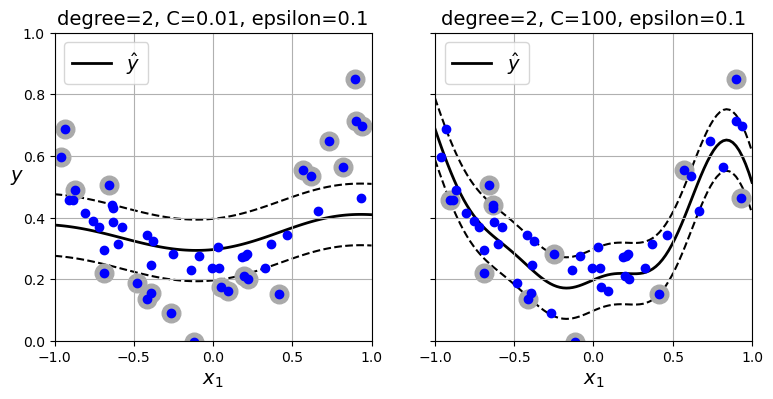

In [26]:
fig, axes = plt.subplots(ncols=2, figsize=(9, 4), sharey=True)
plt.sca(axes[0])
plot_svm_regression(svm_poly_reg, X, y, [-1, 1, 0, 1])
plt.title(f"degree={svm_poly_reg[-1].degree}, "
          f"C={svm_poly_reg[-1].C}, "
          f"epsilon={svm_poly_reg[-1].epsilon}")
plt.ylabel("$y$", rotation=0)
plt.grid()

plt.sca(axes[1])
plot_svm_regression(svm_poly_reg2, X, y, [-1, 1, 0, 1])
plt.title(f"degree={svm_poly_reg2[-1].degree}, "
          f"C={svm_poly_reg2[-1].C}, "
          f"epsilon={svm_poly_reg2[-1].epsilon}")
plt.grid()
plt.show()

From the above figures, we can see that with C=0.01, the number of support vectors are higher (grey circled points) than the ones from the model with C=100. <br>
The model with C=0.01 is more regulated than the one with C=100. <br>
Reducing C makes the margin larger but allows more violations (here the number of points off the margin are higher than when C=100). <br>
While reducing C lowers the risk of overfitting, reducing C too much could result in underfitting. <br>
The model with C=0.01 will probably generalize better than the one with C=100 (that seems to overfit the training data points).
However, this info is only known in treal world applications if the drop in performance between the train and test accuracy (or any other performance metric).
# Trying SVM with other datasets and Benchmarking it with other models

# 1. LinearSVC versus SGDCLassifier

Train a `LinearSVC` on a the iris dataset; it is a linearly separable dataset. <br>
Then train an `SVC` and a `SGDClassifier` on the same dataset. <br>
Finally, Benchmark the models.

Let's use the Iris dataset: the Iris Setosa and Iris Versicolor classes are linearly separable.

In [27]:
from sklearn import datasets

iris = datasets.load_iris(as_frame=True)
X = iris.data[["petal length (cm)", "petal width (cm)"]].values
y = iris.target
# Filtering the dataset of the classes setosa and versicolor
# Create the boolean condition to filter the iris fdataset on the first 2 classes
setosa_or_versicolor = (y == 0) | (y == 1)
X = X[setosa_or_versicolor]
y = y[setosa_or_versicolor]

In order to have fair comparison, we will build and train the models accordingly:
* Since `LinearSVC` uses `loss="squared_hinge"` by default, we will set the `loss="hinge"` for the other 2 models to obtain similar results.
* `LinearSVC` and `SGDClassifier` are both linear models, thus, we need to modify the `SVC`'s kernel from RBF (the default kernel) to linear.
* The `SGDClassifier` class does not have a `C` hyperparameter, but it has another regularization hyperparameter called `alpha`, so we can tweak it to get similar results as the other two models.

In [28]:
from sklearn.svm import SVC, LinearSVC
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler

C = 5
alpha = 0.05
random_state = 7

# Initialize a standard scaler
scaler = StandardScaler()
# Fit the scaler and transform the data to X_scaled
X_scaled = scaler.fit_transform(X)

# Initialize a linearSVC model with the hinge loss, C, and random_state hyperparameters and fit the model
lin_clf = LinearSVC(loss="hinge", C = C, random_state= random_state).fit(X_scaled, y)
...
# Initialize an SVC model with a linear kernel, the hinge loss, C, and random_state hyperparameters and fit the model
svc_clf = SVC(kernel="linear", C = C, random_state= random_state).fit(X_scaled, y)
...
# Initialize a stochastic gradient descent classifier with the hinge loss, alpha, and random_state hyperparameters and fit the model
sgd_clf = SGDClassifier(loss = "hinge", alpha = alpha, random_state= random_state).fit(X_scaled, y)
...

/Users/fulin/anaconda3/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Ellipsis

Let's plot the decision boundaries of these three models and Benchmark their performances:

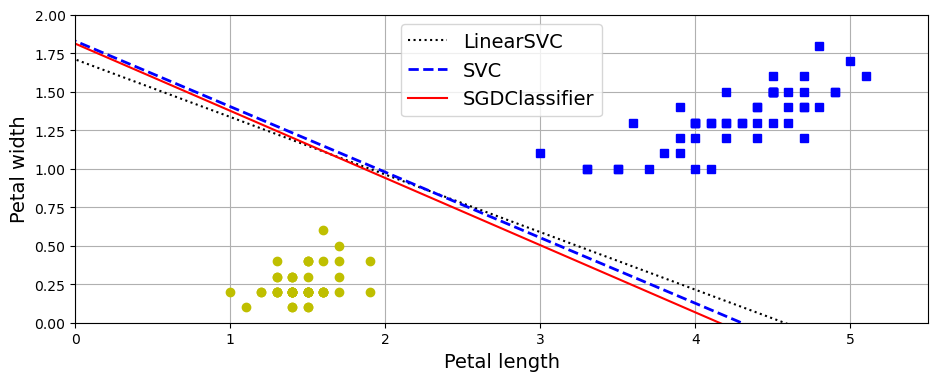

In [29]:
from utils import compute_decision_boundary

lin_line = compute_decision_boundary(lin_clf, scaler)
svc_line = compute_decision_boundary(svc_clf, scaler)
sgd_line = compute_decision_boundary(sgd_clf, scaler)

# Plot all three decision boundaries
plt.figure(figsize=(11, 4))
plt.plot(lin_line[:, 0], lin_line[:, 1], "k:", label="LinearSVC")
plt.plot(svc_line[:, 0], svc_line[:, 1], "b--", linewidth=2, label="SVC")
plt.plot(sgd_line[:, 0], sgd_line[:, 1], "r-", label="SGDClassifier")
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs") # label="Iris versicolor"
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo") # label="Iris setosa"
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.legend(loc="upper center")
plt.axis([0, 5.5, 0, 2])
plt.grid()

plt.show()

As you can clearly see, the decision boundaries of all three modesl are similar.

# 2. Multi-class classification with SVM 
Train an SVM classifier on the Wine dataset from sklearn datasets. <br>
This dataset contains the chemical analysis of 178 wine samples produced by 3 different cultivators: the goal is to train a classification model capable of predicting the cultivator based on the wine's chemical analysis. 

With SVM classifiers as binary classifiers, we will learn how to apply them to multiclass classification.<br>
The SVM classifier converts the multi-class classification to several binary ones using the OVR method. <br>
The One-vs-the-Rest (OvR) multiclass strategy, also known as one-vs-all, strategy consists in fitting one classifier per class. For each classifier, the class is fitted against all the other classes.

In [30]:
from sklearn.datasets import load_wine

# Load the wine data from sklearn datasets, set the parameter as_frame to True in order to obtain the data reshaped as a pandas
# dataframe
wine = load_wine(as_frame=True)

In [31]:
print(wine.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            10.6  30.0    19.5   3.3
    Ma

In [61]:
from sklearn.model_selection import train_test_split
# Split the dataset to train and test sets
X_train, X_test, y_train, y_test = train_test_split(wine.data, wine.frame.target, test_size=0.25,random_state=42)

In [62]:
X_train.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
100,12.08,2.08,1.70,17.5,97.0,2.23,2.17,0.26,1.40,3.30,1.27,2.96,710.0
122,12.42,4.43,2.73,26.5,102.0,2.20,2.13,0.43,1.71,2.08,0.92,3.12,365.0
154,12.58,1.29,2.10,20.0,103.0,1.48,0.58,0.53,1.40,7.60,0.58,1.55,640.0
51,13.83,1.65,2.60,17.2,94.0,2.45,2.99,0.22,2.29,5.60,1.24,3.37,1265.0


In [63]:
y_train.head()

2      0
100    1
122    1
154    2
51     0
Name: target, dtype: int64

Let's start simple, with a linear SVM classifier. It will automatically use the One-vs-All (also called One-vs-the-Rest, OvR) strategy, so there's nothing special we need to do to handle multiple classes. Easy, right?

In [64]:
# Initialize a linear SVM classifier; set the multi_class hyperparameter to one vs the rest
lin_clf = LinearSVC(multi_class="ovr")
# Fit the model on the train data
lin_clf.fit(X_train, y_train)

/Users/fulin/anaconda3/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/fulin/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC()

It seems that the model failed to converge. 

We will simply try to increase the number of training iterations to see if we can resolve the issue.

Re-Initialize a linear SVM classifier; set the multi_class hyperparameter to one vs the rest and the max_iteration to 1 000 000.

In [68]:
lin_clf = LinearSVC(multi_class="ovr", max_iter=1000000, random_state=42)
lin_clf.fit(X_train, y_train)

/Users/fulin/anaconda3/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/fulin/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC(max_iter=1000000, random_state=42)

Even with one million iterations, it still did not converge. There must be another problem.

Let's still evaluate this model with `cross_val_score`, This evaluation will serve as a baseline:

In [69]:
from sklearn.model_selection import cross_val_score
# Initialize and run the cross_val_score with the linearSVC model and the train data; 5 is the default number of folds.
linearSVC_cross_val = cross_val_score(lin_clf, X_train, y_train, cv=5, scoring="accuracy")
linearSVC_cross_val.mean()

/Users/fulin/anaconda3/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/fulin/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/fulin/anaconda3/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/fulin/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/fulin/anaconda3/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to 

0.90997150997151

The accuracy is 91% on this dataset, and it is not great. So what is the problem?
Hint: It has to do with the data.

If you figured it out, re-train the data with the adjustment you made

In [ ]:
scaler = StandardScaler()

In [74]:
lin_clf = make_pipeline(scaler, LinearSVC(multi_class="ovr", max_iter=1000000, random_state=42))
# Fit the model
lin_clf.fit(X_train, y_train)

/Users/fulin/anaconda3/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearsvc', LinearSVC(max_iter=1000000, random_state=42))])

Now that it converges without any problem. Let's measure its performance using the 5 folds cross validation:

In [75]:
from sklearn.model_selection import cross_val_score

linearSVC_cross_val = cross_val_score(lin_clf, X_train, y_train, cv=5, scoring="accuracy")
linearSVC_cross_val.mean()

/Users/fulin/anaconda3/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/fulin/anaconda3/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/fulin/anaconda3/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/fulin/anaconda3/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/fulin/anaconda3/l

0.9774928774928775

The accuracy increased to 97.7\%

Now, try using a kernalized SVM --> switch to SVC and use the rbf kernel.

In [77]:
svm_clf = make_pipeline(scaler, SVC(kernel="rbf", max_iter=1000000, random_state=42))
kernelized_svm_cross_val = cross_val_score(svm_clf, X_train, y_train, cv=5)
kernelized_svm_cross_val.mean()

0.9698005698005698

The accuracy is 96.98\% < 97.75\%.

We will try improve it with a hyperparameter tuning:

In [79]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import loguniform, uniform

param_distrib = {
    "svc__gamma": loguniform(0.001, 0.1),# we have to put svc__ and then the hyperparameter name so Random search knows this hyperparameter belongs to which step in the pipeline
    "svc__C": uniform(1, 10)
}
# Initialize the random search cross validation hyperparameter tuning method for the svm_clf model using the hyperparameters' ranges defined in 
# 'param_distrib', we would like a 5-fold cross validation with 100 random combinations of parameters to be tested only
rnd_search_cv = RandomizedSearchCV(svm_clf, param_distributions=param_distrib, cv=5, n_jobs=-1, verbose=1, random_state=42)
# Fit the rnd_search_cv to the training data
rnd_search_cv.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('standardscaler',
                                              StandardScaler()),
                                             ('svc',
                                              SVC(max_iter=1000000,
                                                  random_state=42))]),
                   n_jobs=-1,
                   param_distributions={'svc__C': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x28acb1ed0>,
                                        'svc__gamma': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x28ac8f990>},
                   random_state=42, verbose=1)

In [80]:
# Print the best score achieved in this search
rnd_search_cv.best_score_

0.9777777777777779

In [81]:
# Print all results from all the experiments
import pandas as pd
results = rnd_search_cv.cv_results_
pd.DataFrame(results)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_svc__C,param_svc__gamma,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.003178,0.001406,0.001183,0.000636,4.745401,0.079695,"{'svc__C': 4.745401188473625, 'svc__gamma': 0....",1.000000,0.962963,0.962963,0.961538,0.961538,0.969801,0.015113,4
1,0.002328,0.000768,0.001868,0.002079,8.319939,0.015751,"{'svc__C': 8.31993941811405, 'svc__gamma': 0.0...",1.000000,0.925926,0.962963,1.000000,1.000000,0.977778,0.029630,1
2,0.001650,0.000789,0.000571,0.000086,2.560186,0.002051,"{'svc__C': 2.560186404424365, 'svc__gamma': 0....",0.962963,1.000000,0.962963,0.923077,1.000000,0.969801,0.028638,4
3,0.003573,0.001174,0.001782,0.000425,1.580836,0.053995,"{'svc__C': 1.5808361216819946, 'svc__gamma': 0...",1.000000,0.962963,0.962963,0.961538,0.961538,0.969801,0.015113,4
4,0.002570,0.001063,0.001022,0.000545,7.01115,0.02607,"{'svc__C': 7.011150117432088, 'svc__gamma': 0....",1.000000,0.925926,0.962963,0.961538,0.961538,0.962393,0.023435,9
5,0.001352,0.000226,0.000521,0.000041,1.205845,0.08706,"{'svc__C': 1.2058449429580245, 'svc__gamma': 0...",1.000000,0.962963,0.962963,0.961538,0.961538,0.969801,0.015113,4
6,0.002201,0.001323,0.000917,0.000543,9.324426,0.002659,"{'svc__C': 9.324426408004218, 'svc__gamma': 0....",0.962963,0.962963,0.962963,0.961538,1.000000,0.970085,0.014967,3
7,0.001639,0.000719,0.001586,0.002018,2.81825,0.002327,"{'svc__C': 2.818249672071006, 'svc__gamma': 0....",0.962963,0.962963,0.962963,0.923077,1.000000,0.962393,0.024335,9
8,0.003861,0.002399,0.000842,0.000571,4.042422,0.011208,"{'svc__C': 4.042422429595377, 'svc__gamma': 0....",1.000000,0.962963,0.962963,0.961538,1.000000,0.977493,0.018384,2
9,0.001762,0.000647,0.000751,0.000338,5.31945,0.003823,"{'svc__C': 5.319450186421157, 'svc__gamma': 0....",0.962963,0.925926,0.962963,0.961538,1.000000,0.962678,0.023431,8


This score is satisfying, Let's find out which of the parameter resulted in the best model. 

In [82]:
best_params = rnd_search_cv.best_params_
best_params

{'svc__C': 8.31993941811405, 'svc__gamma': 0.015751320499779727}

In [83]:
# Print the best model (hint: best estimator)
best_estimator = rnd_search_cv.best_estimator_
best_estimator

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc',
                 SVC(C=8.31993941811405, gamma=0.015751320499779727,
                     max_iter=1000000, random_state=42))])

Now let us test it on the test set:

In [87]:
# Test the best model on the test set
test_score = best_estimator.score(X_test, y_test)
test_score

1.0

This tuned kernelized SVM performs better than the `LinearSVC` model.

However, the test set score is 97.7\% < than the best_score_ from the cross-validation (99.25\%). 

This is quite common: since we did so much hyperparameter tuning, we ended up slightly overfitting the cross-validation test sets. 

It's tempting to tweak the hyperparameters a bit more until we get a better result on the test set, but this is completely wrong --> we will start overfitting the test set.

# SVM Regressor 
Train and fine-tune an SVM regressor on the California housing dataset. 
The dataset can be fetched using `sklearn.datasets.fetch_california_housing()`. 

The targets represent hundreds of thousands of dollars. Since there are over 20,000 instances.

Since SVMs do not scale well to large datasets, they can be slow, so for hyperparameter tuning you should use much less instances (e.g., 2,000), to test many more hyperparameter combinations. 

What is your best model's RMSE?

Load the dataset:

In [88]:
from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing()
X = housing.data
y = housing.target

Split it into a training set and a test set:

In [89]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Train a simple `LinearSVR`:

In [90]:
from sklearn.svm import LinearSVR

# scale data and then fit the model; use sklearn's pipeline 
lin_svr = make_pipeline(StandardScaler(), LinearSVR())
# fit the model
lin_svr.fit(X_train, y_train)

/Users/fulin/anaconda3/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/fulin/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearsvr', LinearSVR())])

Since it did not converge, let's increase `max_iter` and refit the model.

In [91]:
lin_svr = make_pipeline(StandardScaler(), LinearSVR(max_iter=10000))
lin_svr.fit(X_train, y_train)

/Users/fulin/anaconda3/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearsvr', LinearSVR(max_iter=10000))])

Let's see how it performs on the training set:

In [92]:
from sklearn.metrics import mean_squared_error

# Compute the training prediction error using MSE
y_pred = lin_svr.predict(X_train)
mse = mean_squared_error(y_train, y_pred)
mse

0.9571188508783063

Now compute RMSE:

In [93]:
rmse = np.sqrt(mse)
rmse

0.9783245120502226

In this dataset, the targets represent hundreds of thousands of dollars. 

The RMSE gives a rough idea of the kind of error we should expect>

With this model (rmse=0.979) we can expect errors close to $98,000! 

This is not great. 

Let's see if we can do better with an RBF Kernel. 

We will use randomized search with cross validation to find the appropriate hyperparameter values for `C` and `gamma`:

In [98]:
from sklearn.svm import SVR
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import loguniform, uniform

# Initialize the pipeline of scaling and a kernalized SVM regressor
svm_clf = make_pipeline(StandardScaler(), SVR(kernel="rbf"))

param_distrib = {
    "svr__gamma": loguniform(0.001, 0.1),
    "svr__C": uniform(1, 10)
}

# Initialize the random search cross validation hyperparameter tuning method for the svm_clf model using the hyperparameters' ranges defined in 
# 'param_distrib', we would like a 3-fold cross validation with 100 random combinations of parameters to be tested only
rnd_search_cv = RandomizedSearchCV(svm_clf, cv=3, param_distributions=param_distrib, n_jobs=-1, verbose=1)
# Fit the random search models with only the first 2000 training data points
rnd_search_cv.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('standardscaler',
                                              StandardScaler()),
                                             ('svr', SVR())]),
                   n_jobs=-1,
                   param_distributions={'svr__C': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x28b789090>,
                                        'svr__gamma': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x28b78b910>},
                   verbose=1)

In [99]:
# Print the best model
best_model = rnd_search_cv.best_estimator_
best_model

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svr', SVR(C=10.438916045607572, gamma=0.0773576368433891))])

In [100]:
-cross_val_score(rnd_search_cv.best_estimator_, X_train, y_train,
                 scoring="neg_root_mean_squared_error")

array([0.5843156 , 0.57089147, 0.57692343, 0.56670465, 0.59377666])

The rmse is around 0.58 <<< 0.979 

--> the kernelized model is much better than the linear model. 

Let's select this best model and evaluate it on the test set:

In [103]:
y_pred = rnd_search_cv.best_estimator_.predict(X_test)
rmse = mean_squared_error(y_test, y_pred, squared=False)
rmse

0.5855086895227997